In [1]:
import io
from datetime import date, datetime

import pandas as pd
import requests
from matplotlib import pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')),parse_dates=['date'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24086 entries, 0 to 24085
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        24086 non-null  datetime64[ns]
 1   time                        11529 non-null  object        
 2   abbreviation_canton_and_fl  24086 non-null  object        
 3   ncumul_tested               263 non-null    float64       
 4   ncumul_conf                 23539 non-null  float64       
 5   ncumul_hosp                 20948 non-null  float64       
 6   ncumul_ICU                  17965 non-null  float64       
 7   ncumul_vent                 7337 non-null   float64       
 8   ncumul_released             7370 non-null   float64       
 9   ncumul_deceased             21797 non-null  float64       
 10  source                      24084 non-null  object        
 11  current_quarantined_total   0 non-null      float64   

In [3]:
ZH_mask = df.abbreviation_canton_and_fl == 'ZH'

In [4]:
df_ZH=df[ZH_mask]

In [5]:
df_ZH=df_ZH[['date','ncumul_conf','ncumul_deceased']].set_index(['date'])

In [6]:
df_ZH_normd = (df_ZH / 1500000)*100

<Figure size 1800x1000 with 0 Axes>

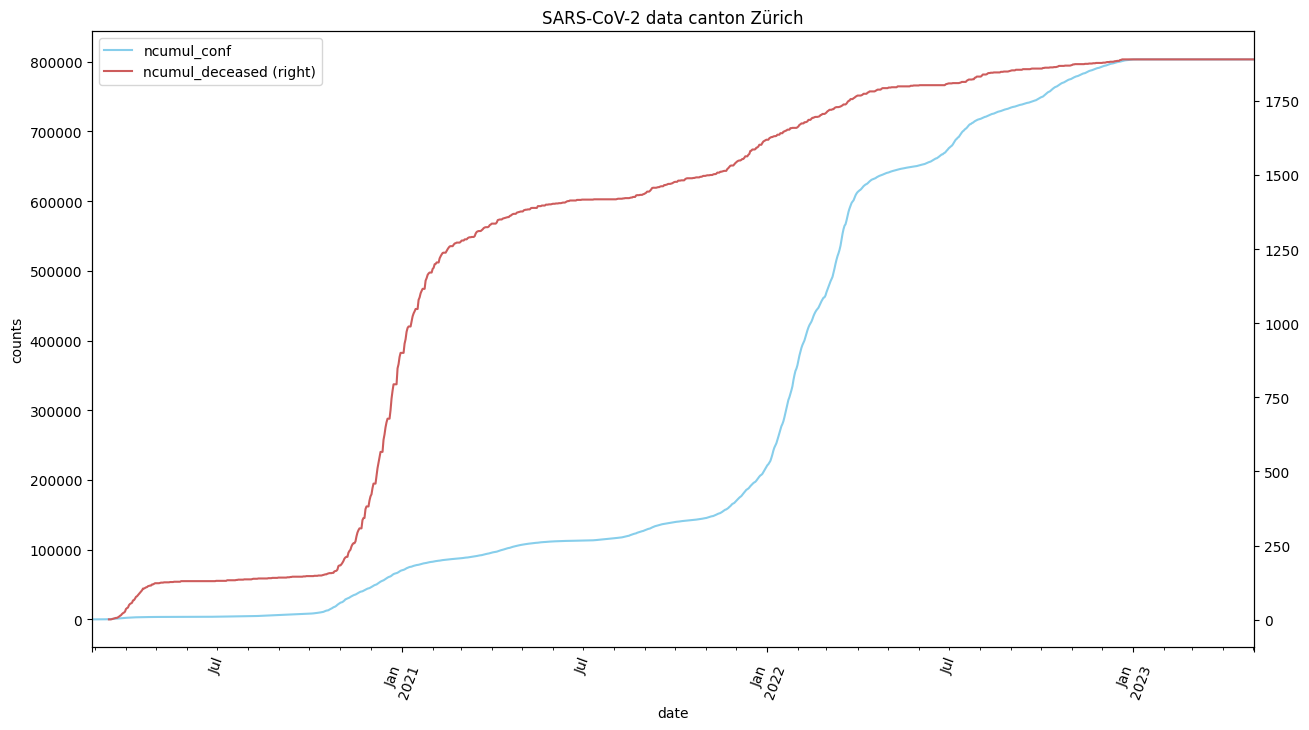

In [7]:
fig = plt.figure(figsize=(18, 10))
ax = df_ZH.plot(color=["SkyBlue","IndianRed"],secondary_y=['ncumul_deceased'],figsize=(15, 8), rot=70, title="SARS-CoV-2 data canton Zürich")
ax.figure.set_facecolor('w')
ax.set_xlabel("date")
ax.set_ylabel("counts")
ax.xaxis_date()
plt.show();